In [ ]:
# import all required packages
import corgietc
import os
import json
import EXOSIMS.Prototypes.TargetList
import EXOSIMS.Prototypes.TimeKeeping
import copy
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# This loads the default input specification
scriptfile = os.path.join(os.environ["CORGIETC_DATA_DIR"], "scripts", "CGI_Noise.json")
with open(scriptfile, "r") as f:
    specs = json.loads(f.read())
TL = EXOSIMS.Prototypes.TargetList.TargetList(**copy.deepcopy(specs))
OS = TL.OpticalSystem
TK = EXOSIMS.Prototypes.TimeKeeping.TimeKeeping(missionLife = 5.25)   # 63 months in years is 5.25, 21 months is 1.75
TK.allocate_time(21*30.4375*u.d)
sInds = 0
mode = OS.observingModes[0]
JEZ = TL.JEZ0[mode["hex"]]/(4.1536**2)
JEZ
dMag = np.array([17.5])
WA = np.array([7.5]) * (mode["lam"]/OS.pupilDiam).to(u.arcsec, equivalencies=u.dimensionless_angles())
WA

In [27]:
sat_dMags = {}
for mode in OS.observingModes:
    WAs = np.linspace(mode["IWA"].value*1.01, mode["OWA"].value*0.99, 100)*mode["IWA"].unit
    sat_dMags[mode["Scenario"]] = OS.calc_saturation_dMag(TL, [sInds]*len(WAs), np.repeat(fZ, len(WAs)), np.repeat(JEZ, len(WAs)), WAs, mode, TK=TK)

Calculating saturation_dMag: 100%|████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 138.70it/s]


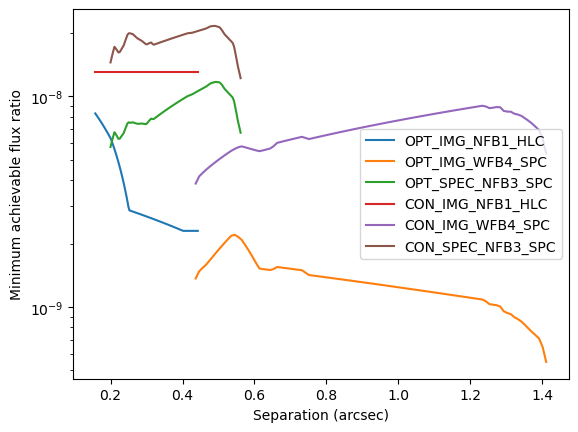

In [28]:
plt.figure()
for mode in OS.observingModes:
    WAs = np.linspace(mode["IWA"].value*1.01, mode["OWA"].value*0.99, 100)*mode["IWA"].unit
    plt.plot(WAs, 10**(-0.4*sat_dMags[mode["Scenario"]]), label=mode["Scenario"])
plt.legend()
plt.yscale("log")
plt.xlabel("Separation (arcsec)")
plt.ylabel("Minimum achievable flux ratio")
plt.savefig("/Users/ds264/Downloads/feh.png", dpi=300)